# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [12]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for idx, n in enumerate(num_neurons):
        if idx == 0:
            x = keras.layers.Dense(units=n, activation="relu", name="hidden_layer%d" % (idx))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation="relu", name="hidden_layer%d" % (idx))(x)
    
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [21]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS=20
BATCH_SIZE=256

opt_SGD = keras.optimizers.SGD()
opt_RMSprop = keras.optimizers.RMSprop()
opt_AdaGrad = keras.optimizers.Adagrad()
opt_Adam = keras.optimizers.Adam()
# opts = [opt_SGD, opt_RMSprop, opt_AdaGrad, opt_Adam]
opts = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']
opts_name = ["opt_SGD", "opt_RMSprop", "opt_AdaGrad", "opt_Adam"]


In [23]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for idx, opt in enumerate(opts):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with opt = %s" % (opts_name[idx]))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = opt
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-%s" % opt
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with opt = opt_SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                528       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 199,450
Trainable params: 199,450
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 38us/step - loss: 2.4727 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 2s 34us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 2s 36us/step - loss: 2.3032 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 2s 36us/step - loss: 2.3029 - acc: 0.0986 - val_loss: 2.3025 - val_acc: 0.1001
Epoch 5/20
50000/50000 [==============================] - 2s 37us/step - loss: 2.3001 - acc: 0.1063 - val_loss: 2.2913 - val_acc: 0.1223
Epoch 6/20
50000/50000 [==============================] - 2s 35us/step - loss: 2.3013 - acc: 0.1009 - val_loss: 2.2996 - val_acc: 0.1076
Epoch 7/20
50000/50000 [==============================] - 2s 36us/step - loss: 2.2773 - acc: 0.1176 - val_loss: 2.2654 - val_acc

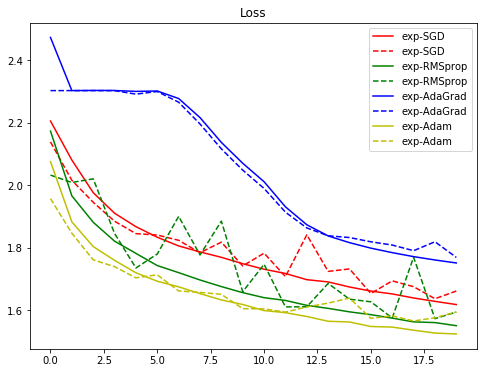

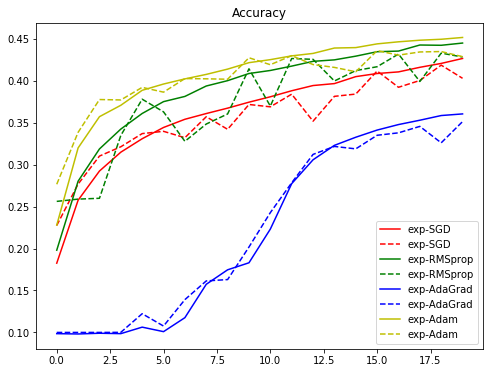

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()